# Deep Learning Project Tutorial: Plot Camera Poses from Reality Capture Export
# 2024 SMWU Deep Learning by Joo Yong Sim

# 실습 과제
### 과제 1. 아래 eul2rot 함수를 완성하세요. 
수정해야하는 내용: 아래 중에서 올바르게 camera pose를 변환하는 rotation matrix를 완성하세요.
- heading, pitch, roll -> rotation about Z, Y, X 또는 X, Y, Z
- XYZ sequence or ZYX sequence

### 과제 2. 다음과 같이 camera frame을 수정하세요.

![](https://raw.githubusercontent.com/jooyongsim/deeplearning_SMWU_2024/main/media/explain.png)



This tutorial demonstrates how to plot the positions and orientations of cameras using their exported data, including their Euler angles (heading, pitch, roll) and coordinates (x, y, altitude). The tutorial utilizes Python libraries such as NumPy for numerical operations, pandas for data handling, and Plotly for 3D visualization.

1. **Rotation Matrix Calculation**: The function `eul2rot` converts Euler angles to a rotation matrix. This matrix is crucial for defining the orientation of each camera in 3D space. The Euler angles are first converted from degrees to radians. Then, individual rotation matrices around the x, y, and z axes (Rx, Ry, Rz) are computed and multiplied in a specific order to get the combined rotation matrix.

2. **Data Loading and Initialization**: The camera data is loaded from a CSV file using pandas. Various parameters like camera scale and colors for the plot are set up.

3. **Camera Body and Frame Definition**: For each camera, both the camera body and its coordinate frame are defined as arrays. The camera body is represented by a simple geometric shape (parallelogram), and the frame by axes originating from the camera's position.

4. **Transformation of Camera Elements**: Each camera's body and frame are rotated and translated according to the camera's rotation matrix and position. This is done by matrix multiplication of the rotation matrix with the camera body and frame arrays, followed by adding the position vector.

5. **Plotting in 3D**: Using Plotly, each element of the camera (body and frame) is added to the figure as a 3D trace. Each camera body is drawn with lines connecting its corners, and the frame is visualized with colored lines representing the RGB axes.

6. **Path Tracing**: Additionally, a trace connecting all camera positions is added to visualize the path followed by the camera.

7. **Rendering and Output**: The layout of the 3D plot is adjusted to ensure an equal aspect ratio and clear axis titles. The plot is then rendered to an HTML file for viewing in a web browser.

This approach effectively visualizes the trajectory and viewing angles of cameras in a reconstructed 3D space, useful in applications like virtual reality, film production, and robotics.

## Convert Euler angles to Rotation matrix


In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly

# 예제 1
def eul2rot(heading, pitch, roll):
    """Converts Euler angles to rotation matrix: heading, pitch, roll -> rotation about Z, Y, X
    XYZ sequence or ZYX sequence - Robot or Mobile """
    heading, pitch, roll = np.deg2rad(heading), np.deg2rad(pitch), np.deg2rad(roll)
    Rz = np.array([
        [np.cos(heading), -np.sin(heading), 0],
        [np.sin(heading), np.cos(heading), 0],
        [0, 0, 1]
    ])
    Ry = np.array([
        [np.cos(pitch), 0, np.sin(pitch)],
        [0, 1, 0],
        [-np.sin(pitch), 0, np.cos(pitch)]
    ])
    Rx = np.array([
        [1, 0, 0],
        [0, np.cos(roll), -np.sin(roll)],
        [0, np.sin(roll), np.cos(roll)]
    ])
    #######################################
    # Fill in to Calculate Rotation Matrix
    #######################################
    # R =
 
    return R

# 예제 2
def eul2rot(heading, pitch, roll):
    """Converts Euler angles to rotation matrix: heading, pitch, roll -> rotation about X, Y, Z
    XYZ sequence or ZYX sequence - Robot or Mobile """
    heading, pitch, roll = np.deg2rad(heading), np.deg2rad(pitch), np.deg2rad(roll)
    Rx = np.array([
        [1, 0, 0],
        [0, np.cos(heading), -np.sin(heading)],
        [0, np.sin(heading), np.cos(heading)]
    ])
    Ry = np.array([
        [np.cos(pitch), 0, np.sin(pitch)],
        [0, 1, 0],
        [-np.sin(pitch), 0, np.cos(pitch)]
    ])
    Rz = np.array([
        [np.cos(roll), -np.sin(roll), 0],
        [np.sin(roll), np.cos(roll), 0],
        [0, 0, 1]
    ])
    #######################################
    # Fill in to Calculate Rotation Matrix
    #######################################
    # R =
    
    return R

## Load data and plot using plotly

In [14]:
data = pd.read_csv('rene4_cpu_int_ext.csv')

camScale = 1
traceColor = 'magenta'
camBodyColor = 'black'

fig = go.Figure()

rows = 240
cols = 480

# To store camera center positions for the path trace
path_x = []
path_y = []
path_z = []

for index, row in data.iloc[::10].iterrows():
    R_gc = eul2rot(row['heading'], row['pitch'], row['roll'])
    p_gc = np.array([row['x'], row['y'], row['alt']])

    path_x.append(p_gc[0])
    path_y.append(p_gc[1])
    path_z.append(p_gc[2])

    # Define the camera body and frame
    camBody = np.zeros((3, 4))
    camBody[:, 0] = camScale * np.array([(rows/2), (rows-50), -(cols/2)]) / 1000
    camBody[:, 1] = camScale * np.array([-(rows/2), (rows-50), -(cols/2)]) / 1000
    camBody[:, 2] = camScale * np.array([-(rows/2), (rows-50), (cols/2)]) / 1000
    camBody[:, 3] = camScale * np.array([(rows/2), (rows-50), (cols/2)]) / 1000

    camFrame = camScale * ((rows/2) / 1000) * np.eye(3)
    #######################################
    # Fill in to Calculate Rotation Matrix
    #######################################
    # e.g.
    # Rz90 = np.array([])
    # Rx_90 = np.array([])
    # camFrame = 
    
    # Rotate and translate the camera body and frame
    camBody = R_gc.dot(camBody) + p_gc[:, np.newaxis]
    camFrame = R_gc.dot(camFrame) + p_gc[:, np.newaxis]

    # Draw the camera body
    for i in range(4):
        fig.add_trace(go.Scatter3d(
            x=[camBody[0, i], p_gc[0]],
            y=[camBody[1, i], p_gc[1]],
            z=[camBody[2, i], p_gc[2]],
            mode='lines',
            line=dict(color=camBodyColor, width=2)
        ))

    fig.add_trace(go.Scatter3d(
        x=camBody[0, [0, 1, 2, 3, 0]],
        y=camBody[1, [0, 1, 2, 3, 0]],
        z=camBody[2, [0, 1, 2, 3, 0]],
        mode='lines',
        line=dict(color=camBodyColor, width=2)
    ))
    
    # Draw the camera frame (RGB axis)
    colors = ['red', 'green', 'blue']
    for i in range(3):
        fig.add_trace(go.Scatter3d(
            x=[camFrame[0, i], p_gc[0]],
            y=[camFrame[1, i], p_gc[1]],
            z=[camFrame[2, i], p_gc[2]],
            mode='lines',
            line=dict(color=colors[i], width=2)
        ))
        
# Add the camera path trace
fig.add_trace(go.Scatter3d(
    x=path_x,
    y=path_y,
    z=path_z,
    mode='lines',
    line=dict(color=traceColor, width=4),
    name='Camera Path'
))

fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
        aspectmode='data'   # Forces equal aspect ratio # 
    ),
    width=800,
    height=600
)

plotly.offline.plot(fig, filename='camera_poses_cpu_ypr_xyz_ZYX_camera_rot_trash.html', auto_open=True)


'camera_poses_cpu_ypr_xyz_ZYX_camera_rot_trash.html'

## Plot using matplotlib (참고)

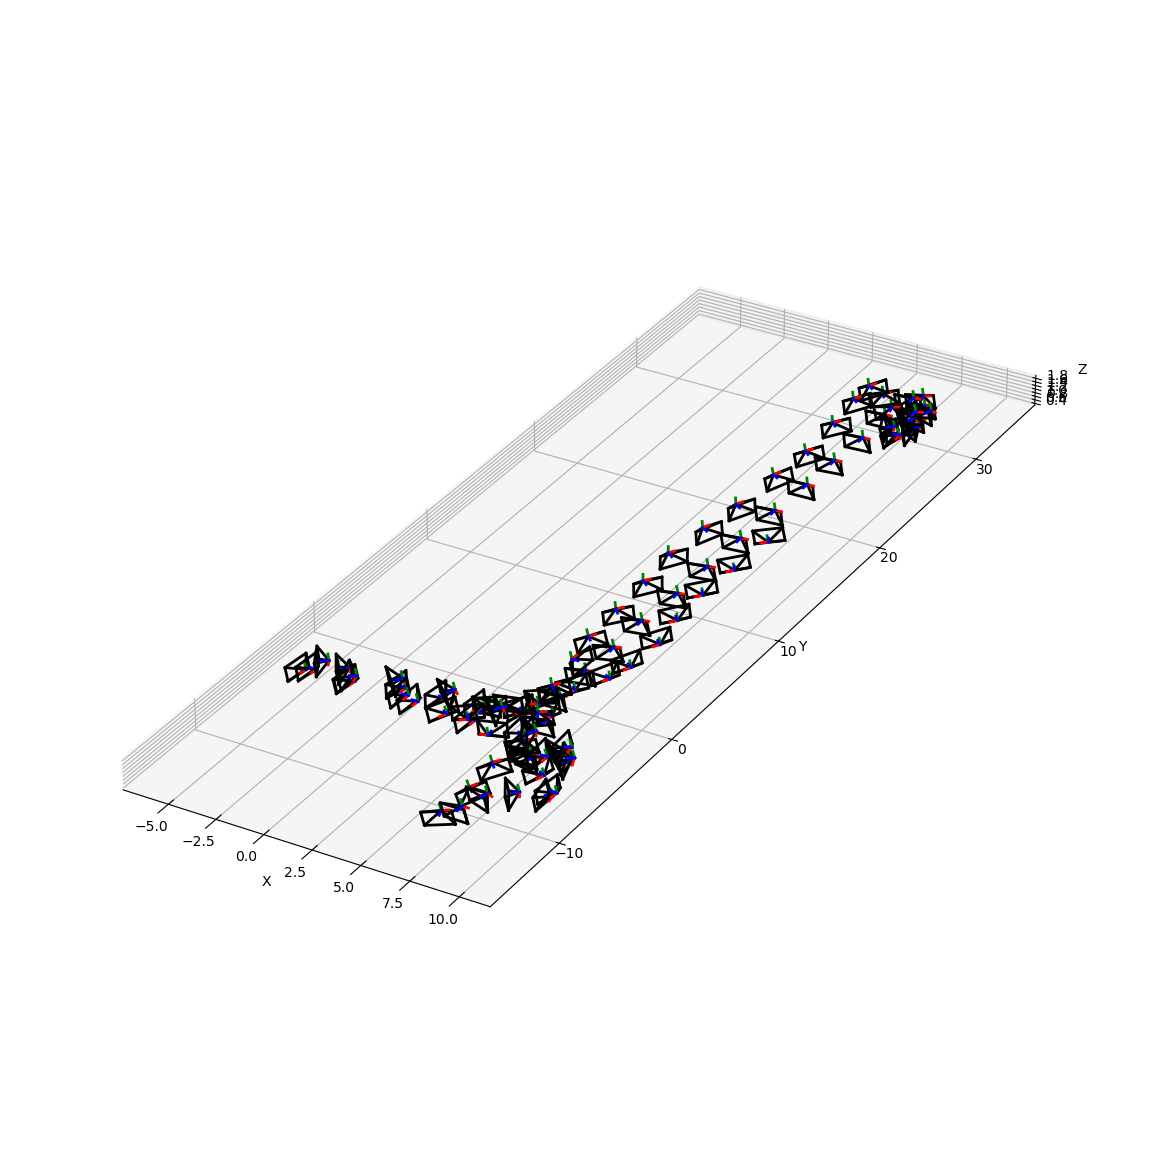

In [21]:
import matplotlib.pyplot as plt
data = pd.read_csv('rene4_cpu_int_ext.csv')

camScale = 3
traceColor = 'magenta'
camBodyColor = 'black'

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

rows = 240
cols = 480

# To store camera center positions for the path trace
path_x = []
path_y = []
path_z = []

for index, row in data.iloc[::10].iterrows():
    R_gc = eul2rot(row['heading'], row['pitch'], row['roll'])
    p_gc = np.array([row['x'], row['y'], row['alt']])

    path_x.append(p_gc[0])
    path_y.append(p_gc[1])
    path_z.append(p_gc[2])

    # Define the camera body and frame
    camBody = np.zeros((3, 4))
    camBody[:, 0] = camScale * np.array([(rows/2), (rows-50), -(cols/2)]) / 1000
    camBody[:, 1] = camScale * np.array([-(rows/2), (rows-50), -(cols/2)]) / 1000
    camBody[:, 2] = camScale * np.array([-(rows/2), (rows-50), (cols/2)]) / 1000
    camBody[:, 3] = camScale * np.array([(rows/2), (rows-50), (cols/2)]) / 1000

    camFrame = camScale * ((rows/2) / 1000) * np.eye(3)
    #######################################
    # Fill in to Calculate Rotation Matrix
    #######################################
    # e.g.
    # Rz90 = np.array([])
    # Rx_90 = np.array([])
    # camFrame = 
    
    # Rotate and translate the camera body and frame
    camBody = R_gc.dot(camBody) + p_gc[:, np.newaxis]
    camFrame = R_gc.dot(camFrame) + p_gc[:, np.newaxis]

    # Draw the camera body
    for i in range(4):
        ax.plot([camBody[0, i], p_gc[0]], [camBody[1, i], p_gc[1]], [camBody[2, i], p_gc[2]], color=camBodyColor, linewidth=2)
    ax.plot(camBody[0, [0, 1, 2, 3, 0]], camBody[1, [0, 1, 2, 3, 0]], camBody[2, [0, 1, 2, 3, 0]], color=camBodyColor, linewidth=2)
    
    # Draw the camera frame (RGB axis)
    colors = ['r', 'g', 'b']
    for i in range(3):
        ax.plot([camFrame[0, i], p_gc[0]], [camFrame[1, i], p_gc[1]], [camFrame[2, i], p_gc[2]], color=colors[i], linewidth=2)

ax.set_aspect('equal')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()